В данном проекте нужно было защитить данные клиентов страховой компании, т.е. разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. При этом качество моделей машинного обучения не должно ухудшиться.


## 1. Загрузка данных

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from numpy import linalg as LA
from sklearn.linear_model import LinearRegression
clients = pd.read_csv('/datasets/insurance.csv')


In [37]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [24]:
clients.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [25]:
clients['Зарплата'] = clients['Зарплата'].astype('int')
clients['Возраст'] = clients['Возраст'].astype('int')

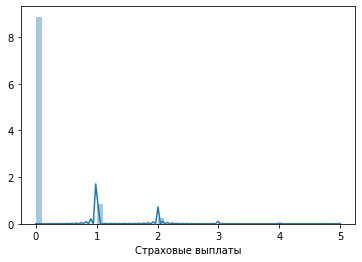

In [26]:
sns.distplot(clients['Страховые выплаты'])

Выплат производится очень мало. В целом, ничего удивительного, это же страховая компания.

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении матрицы признаков на обратимую матрицу, качество линейной регресии не изменится.

**Обоснование:** 

Допустим, что 

$X^T X$ - это квадратная обратимая матрица.


$Z$ - обратимая по определению


$(AB)^T = B^T A^T$

$(AB)^{-1} = B^{-1}A^{-1} $


$AA^{-1} = A^{-1} A = E$ - руководствуемся этим тождеством при преобразовании выражения a'

                        

Подставим $XZ$ вместо $X$ , так как нам нужно умножить матрицу $X (M, N)$ на обратимую матрицу $Z (N, M)$:



$$
w' = ((XZ)^T XZ)^{-1} (XZ)^T y
$$


$$
a' = XZ((XZ)^T XZ)^{-1} (XZ)^T y = XZ(X^T Z^T XZ)^{-1} X^T Z^T y = XZ(X^T Z^T XZ)^{-1} X^T Z^T y = XZZ^{-1}(X^TX)^{-1} Z^TX^T y = XE(X^TX)^{-1} EX^T y = X(X^TX)^{-1} X^T y = Xw
$$

Так как $(X^TX)^{-1} X^T y = w$, то тогда выражения равны.
В итоге получаем, что $a' = a$


## 3. Алгоритм преобразования

**Алгоритм**

Запись в переменные признаков и целевого признака

Создание рандомной обратной матрицы

Обучение модели без преобразования

Получение метрики R2 на модели без преобразования

Умножение обратной матрицы на матрицу признаков

Обучение модели на преобразованых данных

Получение мерики R2 на преобразованых данных

Сравнение метрик

**Обоснование**

Мы умножим наши признаки на квадратную невырожденную матрицу и сравним качество линейной регресии на двух матрицах: умноженной на квадратную невырожденную матрицу и не умноженой на неё.

## 4. Проверка алгоритма

In [33]:
features = clients.drop('Страховые выплаты', axis=1).values
target = clients['Страховые выплаты'].values


Создадим рандомный квадратный массив 4х4:

In [34]:
matrix_Z =np.random.normal(size = (4,4)) 
matrix_Z

array([[-0.52053035,  0.21705965, -0.98232508, -0.9094881 ],
       [-0.63529757,  0.56144283, -0.93882151, -0.90134747],
       [ 1.59404838,  0.80531243, -1.02148644,  0.60767713],
       [-1.18649457,  1.67722103,  0.43638958, -0.39975641]])

Проверяем обратимость марицы:

In [31]:
matrix_Z = LA.inv(matrixZ)
matrix_Z

array([[-0.46509008, -0.1809767 ,  0.0560757 ,  0.17947666],
       [ 0.10716285, -1.28581845, -0.14645813, -1.16293672],
       [-0.24850456, -1.60001674,  0.04205989, -0.23579654],
       [ 0.31056158,  1.0934054 ,  0.55270692,  0.48489712]])

In [35]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('Метрика качества линейной регрессии R2 на исходных признаках:',r2_score(target, predictions))

matrix_new = features @ matrix_Z
model.fit(matrix_new, target)
predictions = model.predict(matrix_new)
print('Метрика качества линейной регрессии R2 на преобразованных признаках:',r2_score(target, predictions))

Метрика качества линейной регрессии R2 на исходных признаках: 0.42494550308169177
Метрика качества линейной регрессии R2 на преобразованных признаках: 0.42494550308159507


Качество линейной регрессии не изменилось, метрика R2 сильно не меняет совего значения, значит можно сделать вывод,что алгоритм преобразования данных работает правильно.